In [4]:
import sys
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [5]:
tk = th.Thicket.from_caliperreader(glob("../cali_files/radix/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 251/251 [00:01<00:00, 172.39it/s]
/home/matthew/.local/lib/python3.10/site-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [6]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
4470530                  2.11.0              16   
4878226                  2.11.0              32   
28339909                 2.11.0              64   
30793891                 2.11.0              16   
55640694                 2.11.0             128   
77761954                 2.11.0             128   
126724101                2.11.0             256   
148629099                2.11.0             128   
155875081                2.11.0              16   
203124437                2.11.0               4   
215245749                2.11.0              64   
258860073                2.11.0             512   
283202835                2.11.0               4   
294477204                2.11.0               4   
300283602                2.11.0              16   
303198934                2.11.0               4   
378205088                2.11.0             256   
396143242                2.11.0              16   
423738933                2.11.0               8   
438452117                2.11.0              16   
459726167                2.11.0             512   
489326002                2.11.0              64   
490477984                2.11.0              64   
499153067                2.11.0              64   
506085642                2.11.0             512   
511863872                2.11.0               4   
524302218                2.11.0             512   
524530426                2.11.0              32   
527734412                2.11.0               8   
532227314                2.11.0              32   
550744914                2.11.0               8   
551613162                2.11.0               2   
594860937                2.11.0             512   
602171932                2.11.0              16   
682412415                2.11.0               8   
683779468                2.11.0             512   
712826318                2.11.0              32   
721197731                2.11.0              64   
742169609                2.11.0              64   
747151764                2.11.0             128   
748953585                2.11.0              64   
752462946                2.11.0             512   
764951917                2.11.0               8   
804744856                2.11.0             256   
811352160                2.11.0              32   
811641170                2.11.0               2   
837041029                2.11.0             128   
861765511                2.11.0             256   
872259894                2.11.0               4   
901568718                2.11.0             128   
920776671                2.11.0               8   
943405608                2.11.0               4   
957758938                2.11.0               2   
959419523                2.11.0               8   
990427123                2.11.0             512   
993423622                2.11.0               8   
1012984784               2.11.0               4   
1054845979               2.11.0             256   
1086357563               2.11.0             512   
1126987737               2.11.0               4   
1176437860               2.11.0              64   
1192745644               2.11.0              16   
1224992781               2.11.0             128   
1228041348               2.11.0              64   
1228759158               2.11.0               2   
1234072986               2.11.0               2   
1264084413               2.11.0             512   
1270016834               2.11.0              64   
1275939782               2.11.0               8   
1323586873               2.11.0             256   
1334446197               2.11.0               2   
1355347080               2.11.0             256   
1380987510               2.11.0             128   
1396717909               2.11.0               2   
1398629068               2.11.0               8   
1414891954               2.11.0             128   
1421307739               2.11.0  

In [7]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

8.236 main
├─ 1.826 MPI_Comm_dup
├─ 0.021 MPI_Comm_split
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 2.457 comm
│  └─ 2.457 comm_large
│     ├─ 0.039 MPI_Allreduce
│     ├─ 0.015 MPI_Alltoall
│     ├─ 0.053 MPI_Alltoallv
│     ├─ 0.270 MPI_Bcast
│     ├─ 0.012 MPI_Gather
│     ├─ 1.958 MPI_Gatherv
│     └─ 0.109 MPI_Scatterv
├─ 0.656 comp
│  ├─ 0.627 comp_large
│  └─ 0.029 comp_small
├─ 0.115 correctness_check
└─ 0.169 data_init_runtime
   └─ 0.033 MPI_Gather

Legend (Metric: Avg time/rank Min: 0.00 Max: 8.24 indices: {'profile': 4470530})
█ 7.41 - 8.24
█ 5.76 - 7.41
█ 4.12 - 5.76
█ 2.47 - 4.12
█ 0.82 - 2.47
█ 0.00 - 0.82

name User code    ◀  Only in left graph    ▶  Only in right graph



In [8]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("input_size")
tk.dataframe = tk.dataframe.reset_index()
tk.dataframe.head()

node   profile  nid   spot.channel  \
0  {'name': 'main', 'type': 'function'}   4470530  1.0  regionprofile   
1  {'name': 'main', 'type': 'function'}   4878226  1.0  regionprofile   
2  {'name': 'main', 'type': 'function'}  28339909  1.0  regionprofile   
3  {'name': 'main', 'type': 'function'}  30793891  1.0  regionprofile   
4  {'name': 'main', 'type': 'function'}  55640694  1.0  regionprofile   

   Min time/rank  Max time/rank  Avg time/rank   Total time  \
0       8.233256       8.236598       8.235710   131.771367   
1       2.006269       2.015073       2.010734    64.343475   
2       1.637597       1.650236       1.643697   105.196592   
3      45.740400      45.743991      45.742583   731.881326   
4      31.462184      31.536153      31.521413  4034.740908   

   Variance time/rank  Min time/rank (exc)  Max time/rank (exc)  \
0            0.000001             1.280026             4.765325   
1            0.000010             1.502711             1.885791   
2            0.000016             1.502610             1.602831   
3            0.000002             0.938780            42.342996   
4            0.000175             1.684317            20.311017   

   Avg time/rank (exc)  Total time (exc)  Calls/rank (min)  Calls/rank (avg)  \
0             2.991643         47.866295               NaN               NaN   
1             1.521473         48.687146               NaN               NaN   
2             1.513377         96.856108               NaN               NaN   
3             3.534930         56.558884               NaN               NaN   
4             2.697686        345.303756               NaN               NaN   

   Calls/rank (max)  Calls/rank (total)  name  num_procs  input_type  \
0               NaN                 NaN  main         16      random   
1               NaN                 NaN  main         32  1perturbed   
2               NaN                 NaN  main         64     reverse   
3               NaN                 NaN  main         16      sorted   
4               NaN                 NaN  main        128  1perturbed   

   input_size  
0    67108864  
1     1048576  
2      262144  
3    67108864  
4   268435456

In [9]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line",
    marker='o',
    title=title,
    xlabel=xlabel,
    ylabel=ylabel,
    figsize=(15,7)
    )
    return plot

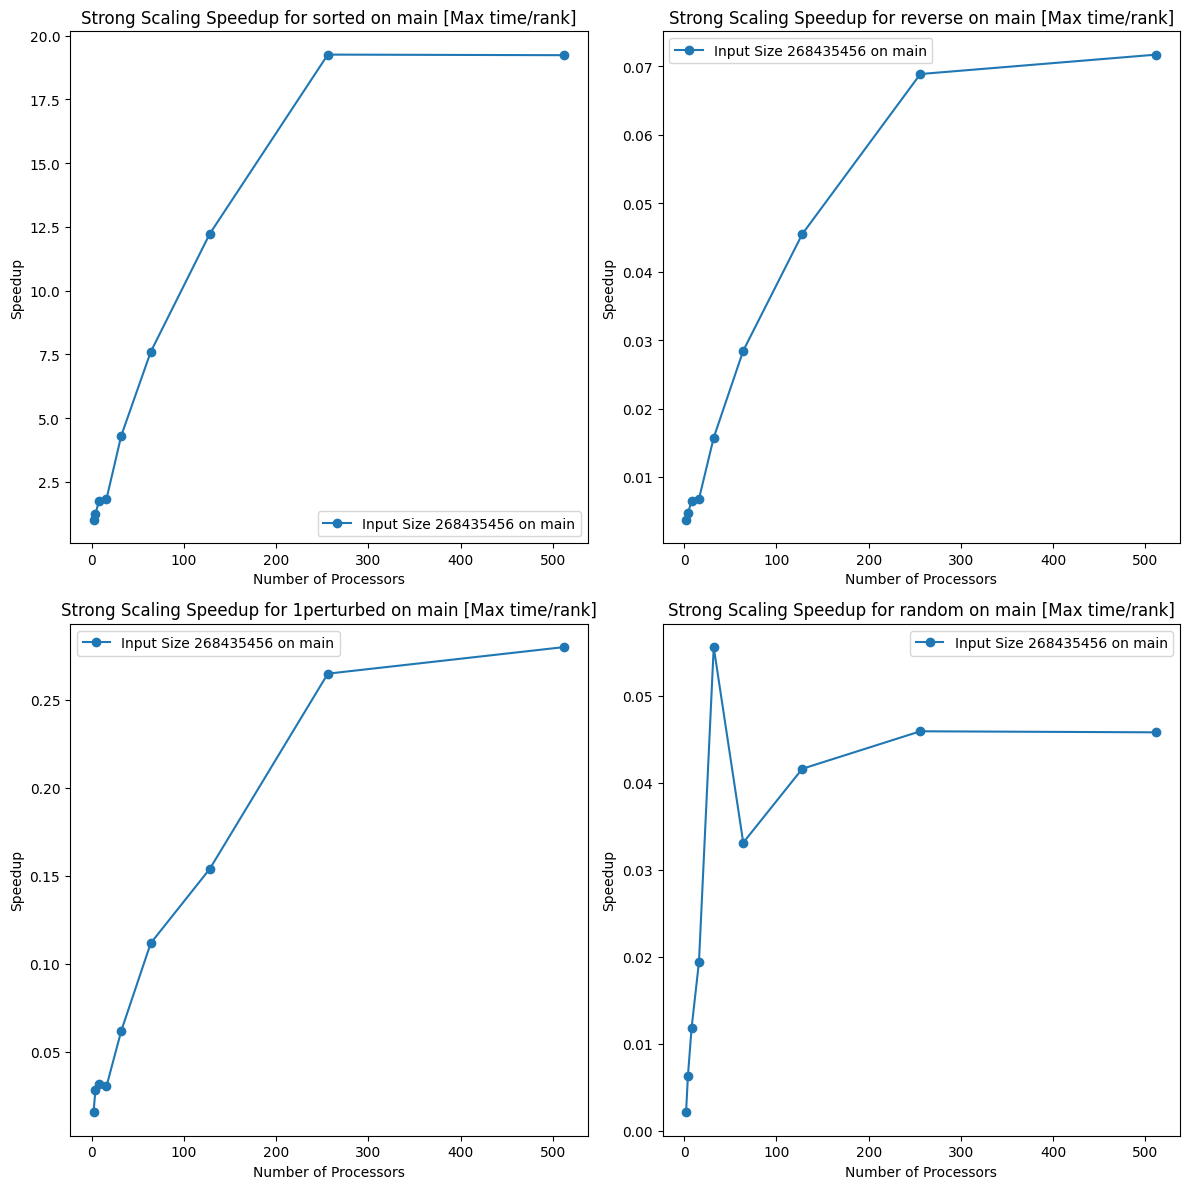

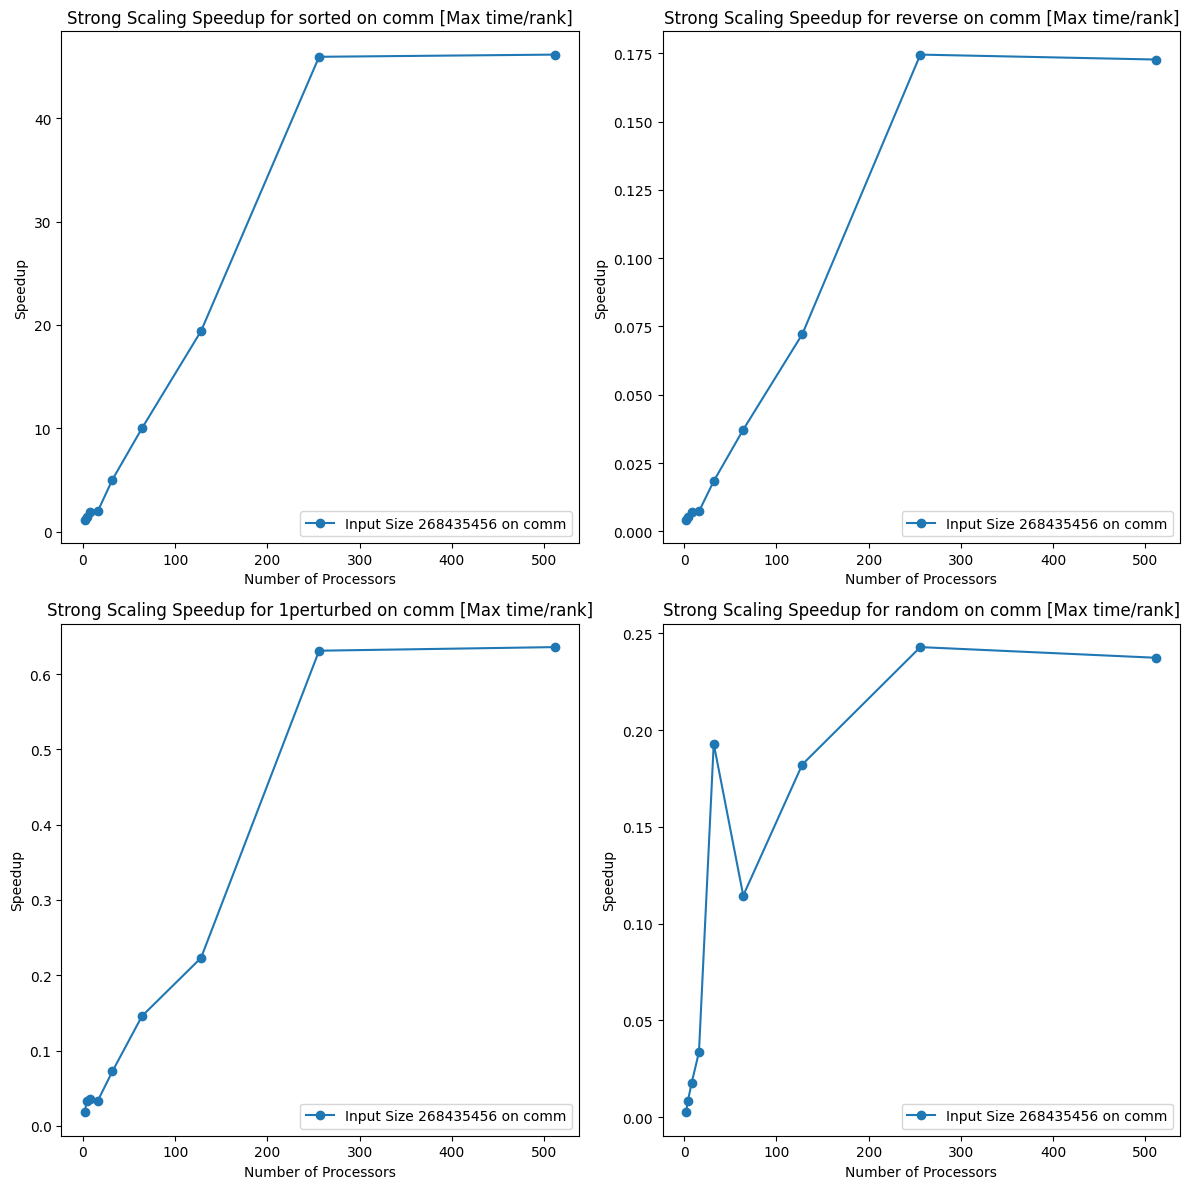

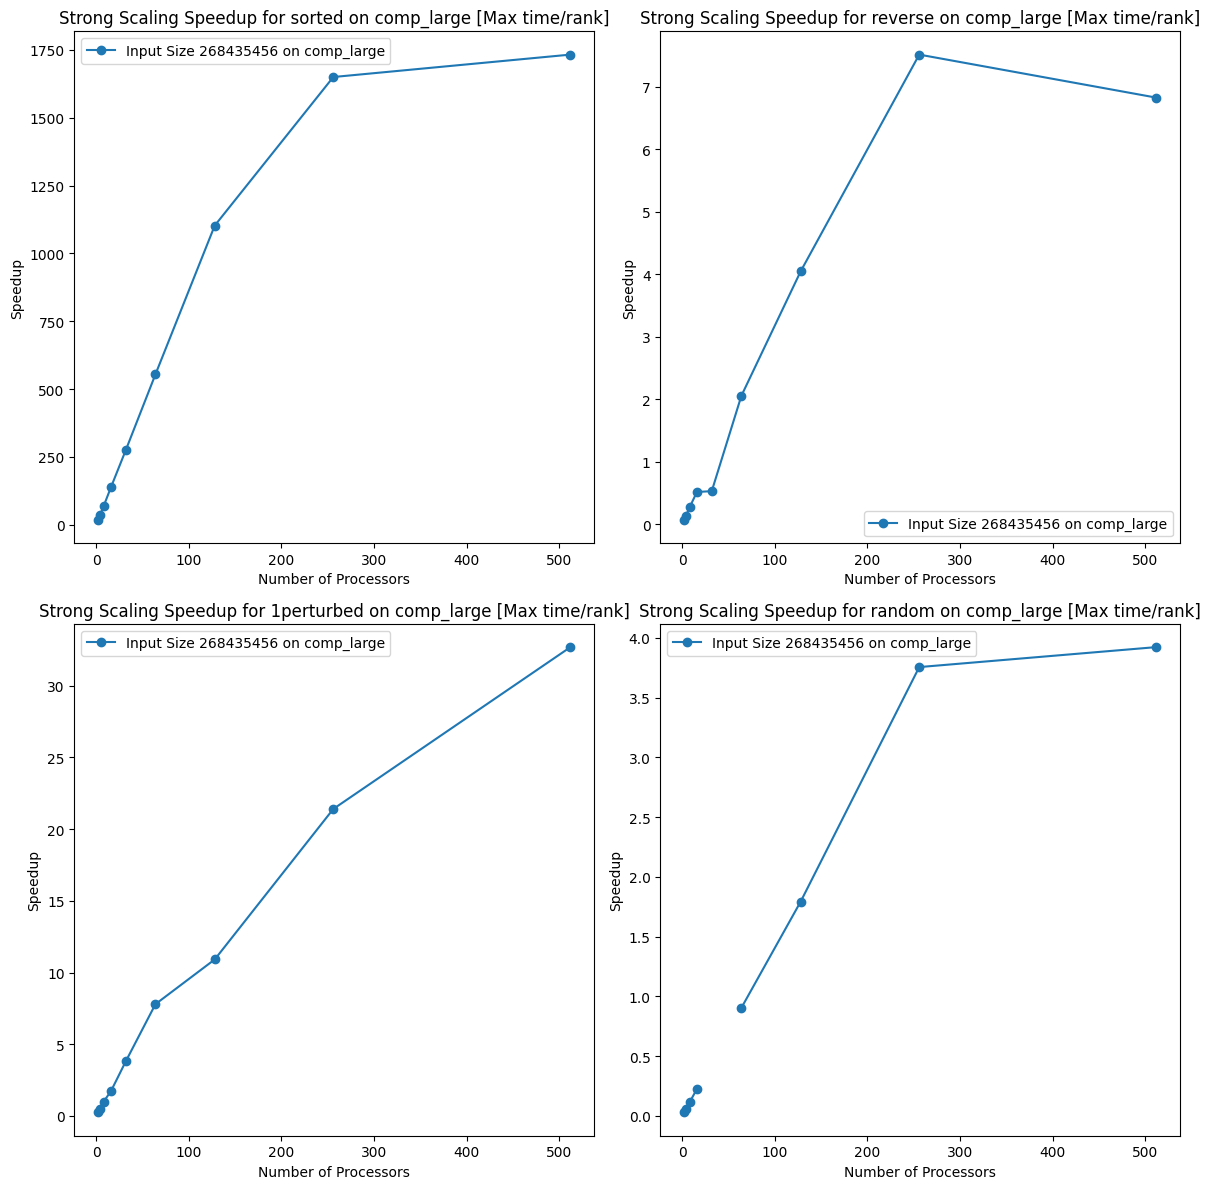

In [15]:
import os

input_sizes = [268435456] # Largest problem size
input_types = ["sorted", "reverse", "1perturbed", "random"]

# Change "type_selector" to the index of what you want to measure
time_types = ["Min time/rank", "Max time/rank", "Avg time/rank", "Total time", "Variance time/rank"]
file_output_label = ["min", "max", "avg", "total", "variance"]
type_selector = 1

# Prepare output folder for plots
output_dir = '../plot_outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to create strong scaling speedup plots with 2x2 subplots
def plot_speedup(tk, input_types):
    for node in tk.graph.traverse():
        node_name = node.frame['name']
        if (node_name == 'comp_large') or (node_name == 'comm') or (node_name == 'main'):
            fig, axs = plt.subplots(2, 2, figsize=(12, 12))
            
            axs = axs.flatten()

            for idx, input_type in enumerate(input_types):
                ax = axs[idx]
                
                baseline_time = tk.dataframe[
                    (tk.dataframe["num_procs"] == 2) & (tk.dataframe["input_type"] == input_type)
                ][time_types[type_selector]].values[0]
                
                for input_size in input_sizes:
                    data = tk.dataframe[
                        (tk.dataframe["input_type"] == input_type) & 
                        (tk.dataframe["input_size"] == input_size) & 
                        (tk.dataframe['node'] == node)
                    ]
                    data = data.sort_values(by="num_procs")
                    
                    speedup = baseline_time / data[time_types[type_selector]]
                    ax.plot(data["num_procs"], speedup, marker='o', label=f'Input Size {input_size} on {node_name}')
                
                ax.set_title(f'Strong Scaling Speedup for {input_type} on {node_name} [{time_types[type_selector]}]')
                ax.set_xlabel('Number of Processors')
                ax.set_ylabel('Speedup')
                ax.legend()

            # Hide any unused subplots (if there are fewer than 4 input types)
            for j in range(idx + 1, len(axs)):
                fig.delaxes(axs[j])

            # Adjust layout to prevent overlap of subplot titles, labels, etc.
            plt.tight_layout()

            # Save plot to file
            filename = f'speedup_{file_output_label[type_selector]}_{input_type}_{node_name}_size{input_size}.png'
            filepath = os.path.join(output_dir, filename)
            plt.savefig(filepath, format='png', dpi=300)

            plt.show()




plot_speedup(tk, input_types)

In [11]:
tk.dataframe = tk.dataframe.reset_index()#.set_index(["node"])
tk.dataframe

index                                               node     profile  \
0         0               {'name': 'main', 'type': 'function'}     4470530   
1         1               {'name': 'main', 'type': 'function'}     4878226   
2         2               {'name': 'main', 'type': 'function'}    28339909   
3         3               {'name': 'main', 'type': 'function'}    30793891   
4         4               {'name': 'main', 'type': 'function'}    55640694   
5         5               {'name': 'main', 'type': 'function'}    77761954   
6         6               {'name': 'main', 'type': 'function'}   126724101   
7         7               {'name': 'main', 'type': 'function'}   148629099   
8         8               {'name': 'main', 'type': 'function'}   155875081   
9         9               {'name': 'main', 'type': 'function'}   203124437   
10       10               {'name': 'main', 'type': 'function'}   215245749   
11       11               {'name': 'main', 'type': 'function'}   258860073   
12       12               {'name': 'main', 'type': 'function'}   283202835   
13       13               {'name': 'main', 'type': 'function'}   294477204   
14       14               {'name': 'main', 'type': 'function'}   300283602   
15       15               {'name': 'main', 'type': 'function'}   303198934   
16       16               {'name': 'main', 'type': 'function'}   378205088   
17       17               {'name': 'main', 'type': 'function'}   396143242   
18       18               {'name': 'main', 'type': 'function'}   423738933   
19       19               {'name': 'main', 'type': 'function'}   438452117   
20       20               {'name': 'main', 'type': 'function'}   459726167   
21       21               {'name': 'main', 'type': 'function'}   489326002   
22       22               {'name': 'main', 'type': 'function'}   490477984   
23       23               {'name': 'main', 'type': 'function'}   499153067   
24       24               {'name': 'main', 'type': 'function'}   506085642   
25       25               {'name': 'main', 'type': 'function'}   511863872   
26       26               {'name': 'main', 'type': 'function'}   524302218   
27       27               {'name': 'main', 'type': 'function'}   524530426   
28       28               {'name': 'main', 'type': 'function'}   527734412   
29       29               {'name': 'main', 'type': 'function'}   532227314   
30       30               {'name': 'main', 'type': 'function'}   550744914   
31       31               {'name': 'main', 'type': 'function'}   551613162   
32       32               {'name': 'main', 'type': 'function'}   594860937   
33       33               {'name': 'main', 'type': 'function'}   602171932   
34       34               {'name': 'main', 'type': 'function'}   682412415   
35       35               {'name': 'main', 'type': 'function'}   683779468   
36       36               {'name': 'main', 'type': 'function'}   712826318   
37       37               {'name': 'main', 'type': 'function'}   721197731   
38       38               {'name': 'main', 'type': 'function'}   742169609   
39       39               {'name': 'main', 'type': 'function'}   747151764   
40       40               {'name': 'main', 'type': 'function'}   748953585   
41       41               {'name': 'main', 'type': 'function'}   752462946   
42       42               {'name': 'main', 'type': 'function'}   764951917   
43       43               {'name': 'main', 'type': 'function'}   804744856   
44       44               {'name': 'main', 'type': 'function'}   811352160   
45       45               {'name': 'main', 'type': 'function'}   811641170   
46       46               {'name': 'main', 'type': 'function'}   837041029   
47       47               {'name': 'main', 'type': 'function'}   861765511   
48       48               {'name': 'main', 'type': 'function'}   872259894   
49       49               {'name': 'main', 'type': 'function'}   901568718   
50       50               {'